<a href="https://colab.research.google.com/github/Sanjeevhegde009/Netflix-Movies-and-TV-Shows-Clustering/blob/main/Netflix_Movies_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Netflix Movies and TV Shows Clustering



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **By -**             Sanjeev Hegde


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

https://github.com/Sanjeevhegde009/Netflix-Movies-and-TV-Shows-Clustering

# **Problem Statement**


**To provide various insights and cluster similar shows/movies from the data set collected by Flixable which is a third-party Netflix search engine.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pylab as pl
import plotly.express as px
import plotly.graph_objects as go
from numpy import *
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

sns.set_theme(style='darkgrid', palette='mako')

import nltk
nltk.download('all', quiet=True)
from nltk import ne_chunk     #for recognition of a named entity

from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE

#stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk import word_tokenize, sent_tokenize
from nltk.stem import PorterStemmer, LancasterStemmer, SnowballStemmer, WordNetLemmatizer
STOPWORDS= set(stopwords.words('english'))

#Vectorizer and DTM
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD

#Clustering
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.sparse import csr_matrix

#Kernel
from sklearn.metrics.pairwise import linear_kernel

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Dataset Loading

In [2]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
netflix_data=pd.read_csv('/content/drive/MyDrive/Netflix Movies and TV Shows Clustering/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

In [4]:
#copying the data for further process
df= netflix_data.copy()

### Dataset First View

In [5]:
# Dataset First Look
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [6]:
df.tail(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


### Dataset Rows & Columns count

In [7]:
# Dataset Rows & Columns count
print('rows,columns: '+str(df.shape))

rows,columns: (7787, 12)


### Dataset Information

In [8]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [9]:
# Dataset Duplicate Value Count
f'there are {sum(df.duplicated())} duplicates in the data set'

'there are 0 duplicates in the data set'

#### Missing Values/Null Values

In [10]:
# Missing Values/Null Values Count
missing=df.isnull().sum()
print(missing)

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64


<BarContainer object of 12 artists>

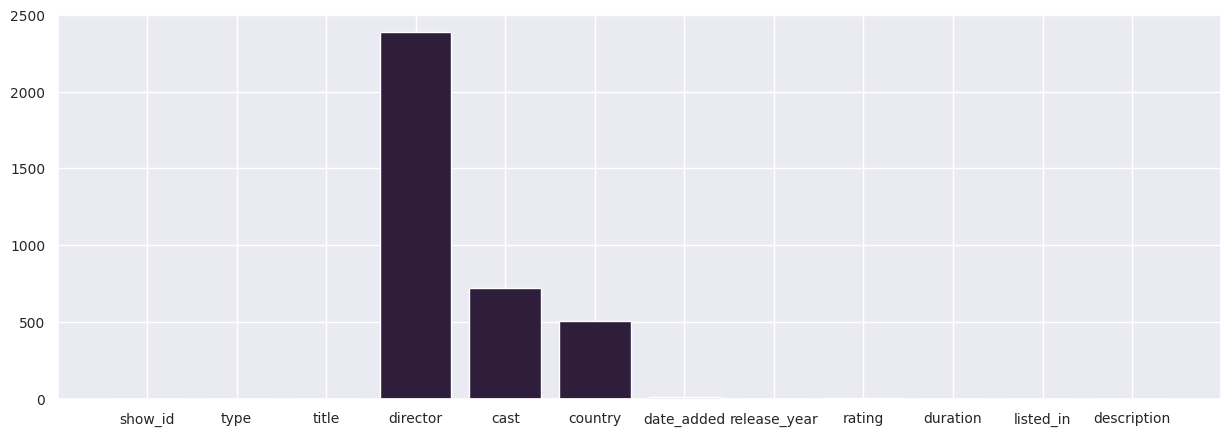

In [11]:
# Visualizing the missing values
fig, ax = plt.subplots(figsize=(15, 5))
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
plt.bar(missing.index, missing.values, )


### What did you know about your dataset?

From the above process it is clear that:


*   Data set consists of 7787 rows and 12 columns.
*   All the features in the data set are object type except release_year which is int64.
*   There are no duplicate entries in the data set.
*   3 features contain null values with director feature having highest number of null values for 2389 entries.





## ***2. Understanding Your Variables***

In [12]:
# Dataset Columns
df.columns.tolist()

['show_id',
 'type',
 'title',
 'director',
 'cast',
 'country',
 'date_added',
 'release_year',
 'rating',
 'duration',
 'listed_in',
 'description']

In [13]:
# Dataset Describe
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
show_id,7787,7787,s1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,7787,2,Movie,5377,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,7787,7787,3%,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
director,5398,4049,"Raúl Campos, Jan Suter",18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cast,7069,6831,David Attenborough,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,7280,681,United States,2555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_added,7777,1565,"January 1, 2020",118,NaN,NaN,NaN,NaN,NaN,NaN,NaN
release_year,7787.0,NaN,NaN,NaN,2013.93258,8.757395,1925.0,2013.0,2017.0,2018.0,2021.0
rating,7780,14,TV-MA,2863,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,7787,216,1 Season,1608,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Variables Description 



1.   show_id: Unique IO for every Movie / Tv Show
2.   type: Identifier - A Movie or TV Show
3.   title: Title Of the movie/show
4.   director: Director of the show
5.   cast: Actors involved
6.   country: Country of production
7.   date_added: Date it was added on Netflix
8.   release-year: Actual release year Of the Show
9.   rating: TV rating of the show
10.  duration: Total duration in minutes or number of
seasons
11.  listed-in: Genre
12.  Description: The summary description



### Check Unique Values for each variable.

In [14]:
# Check Unique Values for each variable.
df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [15]:
# Treating null values
# 1. Director, cast and country - We can fill the null values for these categorical variables with the mode values
df['director'].fillna(df['director'].mode()[0], inplace=True)
df['cast'].fillna(df['cast'].mode()[0], inplace=True)
df['country'].fillna(df['country'].mode()[0], inplace=True)

In [16]:
# 2. Drop null values in date_added and rating
df.dropna(subset=['date_added','rating'], inplace=True)

In [17]:
#checking the number of null values in the data set again
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [18]:
#converting the date_added column into datetime format
df['date_added']=pd.to_datetime(df['date_added'])

In [19]:
#extratcting day, month and year of addition
df['day_added']= df['date_added'].dt.day
df['month_added']= df['date_added'].dt.month
df['year_added']= df['date_added'].dt.year

In [20]:
#checking the new columns
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,day_added,month_added,year_added
0,s1,TV Show,3%,"Raúl Campos, Jan Suter","João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,14,8,2020
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,23,12,2016
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",20,12,2018
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",16,11,2017
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,1,1,2020


In [21]:
#Getting the unique values in ratings column
df['rating'].unique().tolist()

['TV-MA',
 'R',
 'PG-13',
 'TV-14',
 'TV-PG',
 'NR',
 'TV-G',
 'TV-Y',
 'TV-Y7',
 'PG',
 'G',
 'NC-17',
 'TV-Y7-FV',
 'UR']

The codes are as per the Netflix ratings system which is likeley to have been adapted from Motion Pictures Association(MPA) in USA. We can use the following understandable one word instead of the jagrons used above.

'TV-MA': Mature

'R': Restricted

'PG-13': ParentalGuidance13

'TV-14': 'Teen'

'TV-PG': 'Family-friendly'

'NR': NotRated

'TV-G': 'General',

'TV-Y': 'Children'

'TV-Y7': 'Youth'

'PG': ParentalGuidance

'G': General

'NC-17': AdultsOnly

'TV-Y7-FV': TVY7FantasyViolence

'UR': Unrated

In [22]:
#encoding the same in the ratings column
nomenclature={
    'TV-MA': 'Mature',
    'R': 'Restricted',
    'PG-13': 'ParentalGuidance13',
    'TV-14': 'Teen',
    'TV-PG': 'Family-friendly',
    'NR': 'NotRated',
    'TV-G': 'General',
    'TV-Y': 'Children',
    'TV-Y7': 'Youth',
    'PG': 'Parental Guidance',
    'G': 'General',
    'NC-17': 'Adults Only',
    'TV-Y7-FV': 'Fantasy Violence',
    'UR': 'Unrated'}

df['audience']=df['rating'].replace(nomenclature)

In [23]:
#checking for the changes in the dataset
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,day_added,month_added,year_added,audience
0,s1,TV Show,3%,"Raúl Campos, Jan Suter","João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,14,8,2020,Mature
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,23,12,2016,Mature
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",20,12,2018,Restricted
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",16,11,2017,ParentalGuidance13
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,1,1,2020,ParentalGuidance13


### What all manipulations have you done and insights you found?

1. Null values in director, cast, country have been replaced with the mode values
2. Entries with null values in column date_added and rating have been dropped since these entries are small in number
3. date_added column has been converted to datetime format from object64 format. Further, date_added, month_added and year_added columns have been created for better insights.
4. Ratings have been converted to more understable formats from Netflix standards which is likely to have been adapted from MPA.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [24]:
sns.set_theme(style='whitegrid', palette= 'tab10')

#### Chart - 1 Pie Chart for Type of content in the data set

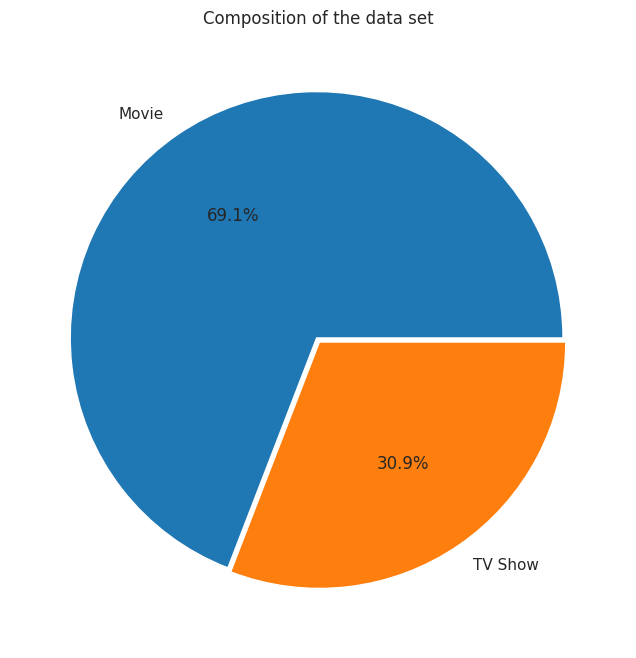

In [25]:
# Chart - 1 
plt.figure(figsize=(10,8))
plt.title('Composition of the data set')
plt.pie(df.type.value_counts(), explode=(0.01,0.01), labels= df.type.value_counts().index, autopct='%1.1f%%')
plt.show()

##### 1. Why did you pick the specific chart?

Pie chart has been chosen to represent the type of content that constitute the data set.

##### 2. What is/are the insight(s) found from the chart?

It can be observed that 69.1 percent of the items in the data set are movies while others are TV Shows.

##### 3. Will the gained insights help creating a positive business impact? 

It can be concluded that much of the content on Netflix is movies. Further, proven the demand for higher number of movies on the platform, it is important for the platform to focus on acquiring more of the movies for their audience to watch.

#### Chart - 2  Bar Chart

Text(0.5, 1.0, 'Year wise trend of content added')

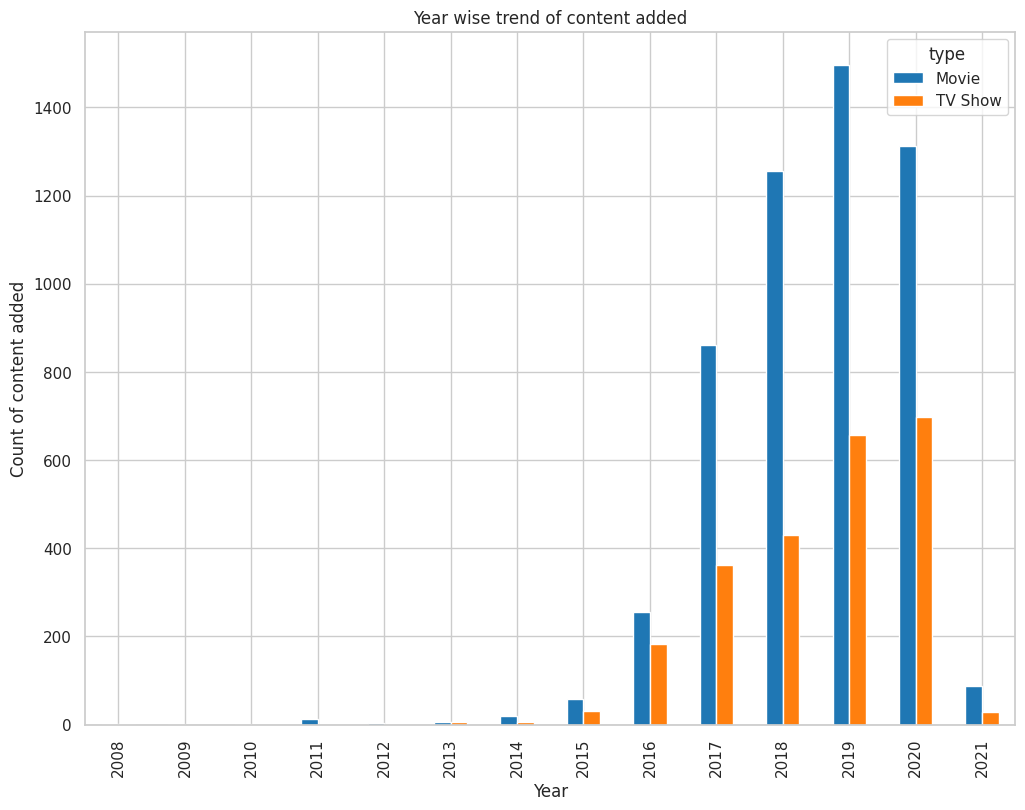

In [26]:
# Chart - 2 
plt.rcParams['figure.figsize']= (12,9)  
#group the data by year and type, reset the index to count
group= df.groupby(['year_added', 'type']).size().reset_index(name='count')

#create seperate column for each type
group1= group.pivot(index='year_added', columns= 'type', values='count')

#create the plot
ax= group1.plot(kind='bar')
ax.set_xlabel('Year')
ax.set_ylabel('Count of content added')
ax.set_title('Year wise trend of content added')


##### 1. Why did you pick the specific chart?

Bar chart was chosen specifically to understand the the growth and trend with respect to the content being added to Netflix platform.

##### 2. What is/are the insight(s) found from the chart?

It can be clearly seen that there was an exponential growth with respect to the number of Movies and TV Shows being added to the platform starting during the year 2014. However, it can be seen that number of TV Shows added are steadily rising while number of movies added each year has fallen from 2019 onwards.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

1. It can be identified that demand for Tv shows is steadily growing and sufficient resources need to be allocated for development or acquiring the Tv Shows.
2. This insight also helps the firm being on the top among the competition.
3. The boom is likely caused due to covid outbreak and internet being a costly affair to the public anymore.
4. Similarly, Demand for movies is significantly high while compared to TV shows however, the demand is declined slighlty compared 2019 which was the year of Covid outbreak

#### Chart - 3

In [27]:
df['release_year'].nunique()

73

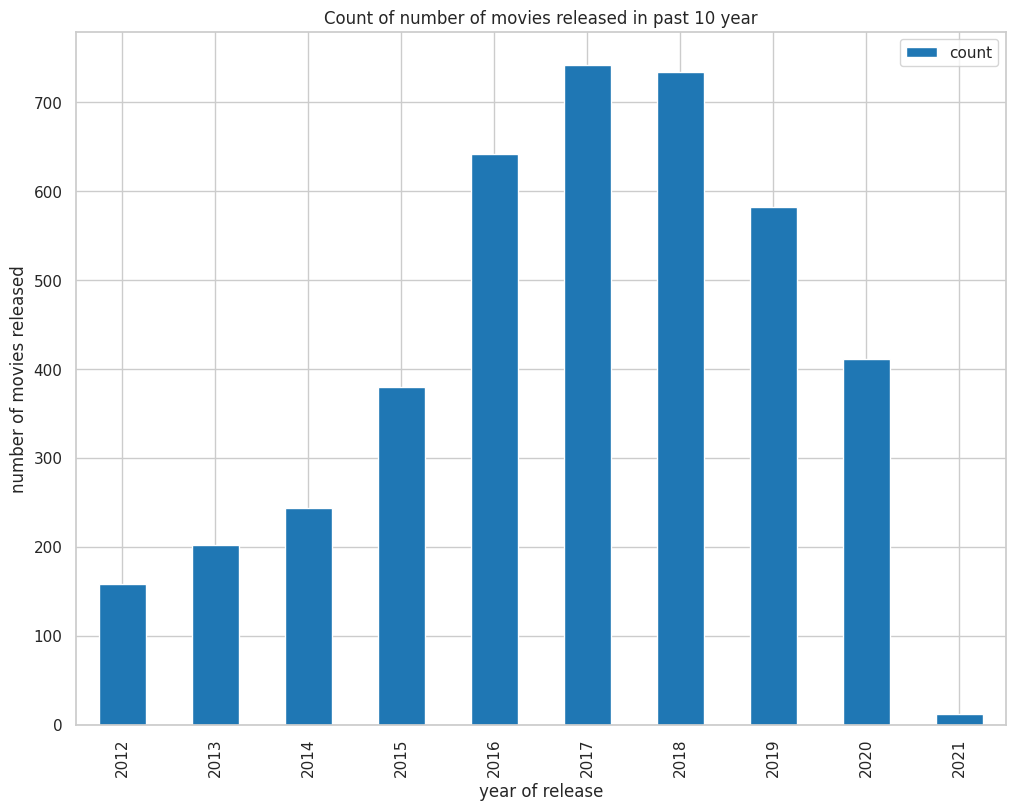

In [28]:
# Chart - 3 visualization code
movies= df[df['type']=='Movie']

movies_trend= movies.groupby('release_year').size().reset_index(name='count')
only_last_10= movies_trend.tail(10)

ax= only_last_10.plot(kind='bar', x= 'release_year', y= 'count')
ax.set_xlabel('year of release')
ax.set_ylabel('number of movies released')
ax.set_title('Count of number of movies released in past 10 year')
plt.show()

##### 1. Why did you pick the specific chart?

The bar chart has been chosen in order to understand the trend in number of movies being released each year during the past 10 years. (PS: as on the last date of collection of data)

##### 2. What is/are the insight(s) found from the chart?

It can be observed that number of movies released each year has grown drastically from 2012 to till 2017. However, after 2017 it can be observed that number of movies released each year has declined. 

##### 3. Will the gained insights help creating a positive business impact? 
There could be two mainly possible reasons for thee decline in the number of movies being released each year:

1. The interest of the audience has shifted from watching movies to TV shows which could be due to several reasons. This can be further verified on inspecting the number of TV Shows released each year.
2. Covid outbreak may also be another reason as we can see a significant decline in number of movies being released from 2019 onwards

Answer Here

#### Chart - 4

Text(0.5, 1.0, 'Number of TV shows released during past 10 years')

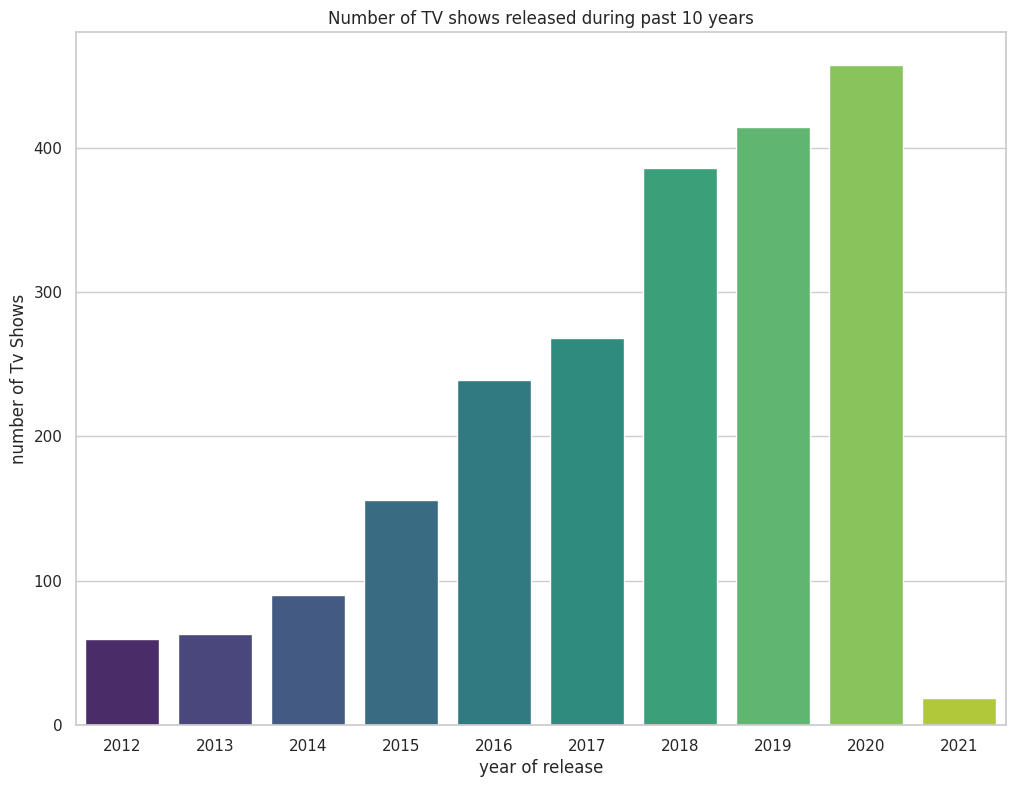

In [29]:
# Chart - 4 
tv_show= df[df['type']=='TV Show']

show_trend= tv_show.groupby('release_year').size().reset_index(name='count')
last_10= show_trend.tail(10)

sns.barplot(data= last_10, x= 'release_year', y='count', palette='viridis')
plt.xlabel('year of release')
plt.ylabel('number of Tv Shows')
plt.title('Number of TV shows released during past 10 years')

##### 1. Why did you pick the specific chart?

It can be seen that there is a rapid growth in the number of TV Shows released each year from the above graph.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 


The main inference that can be drawn from the above graph is the growth pace of Tv shows. As copmared to movies which are released lesser each year after 2017, TV Shows are increasing in number. Hence, it can be noted that people watching TV shows is growing each year as compared to number of people watching movies.
Thus, it is important for the platform to buy as many quality TV shows as possible while buying only extremely potent movies.

#### Chart - 5

Text(0.5, 1.0, 'month wise distribution of content added')

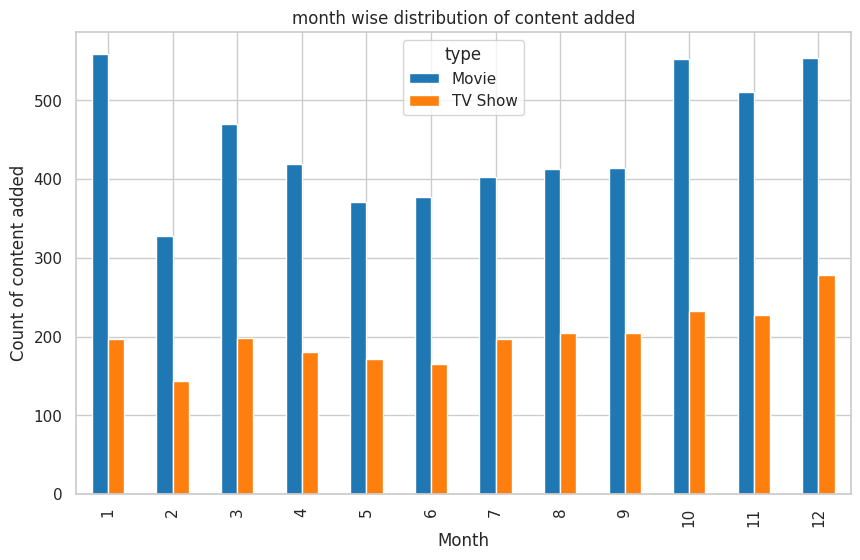

In [30]:
from matplotlib.backend_bases import rcParams
# Chart - 5
plt.rcParams['figure.figsize']= (10,6) 
# calculating the number of shows released in each month
monthly= df.groupby(['month_added', 'type']).size().reset_index(name='count')

#create seperate column for each type in the graph
monthly_sep= monthly.pivot(index='month_added', columns= 'type', values='count')

#create the plot
rcParams
ax= monthly_sep.plot(kind='bar')
ax.set_xlabel('Month')
ax.set_ylabel('Count of content added')
ax.set_title('month wise distribution of content added')

##### 1. Why did you pick the specific chart?

Bar chart has been chosen as the appropriate chart since it is easily understandable and suffivient enough to visualize the distribution of the underlying month wise distribution

##### 2. What is/are the insight(s) found from the chart?

It is evident that most of the content is added during January, October, November and December

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Since most content is onboarded during the above mentioned months in the industry, it is appropriate to have surplus budget during these months primarily meant for purchase of TV Shows and Movies, while during the rest of the months, budget can be allocated more to other operations.

#### Chart - 6

In [31]:
df['audience'].unique()

array(['Mature', 'Restricted', 'ParentalGuidance13', 'Teen',
       'Family-friendly', 'NotRated', 'General', 'Children', 'Youth',
       'Parental Guidance', 'Adults Only', 'Fantasy Violence', 'Unrated'],
      dtype=object)

Text(0.5, 1.0, 'rating wise distribution of the content of netflix shows')

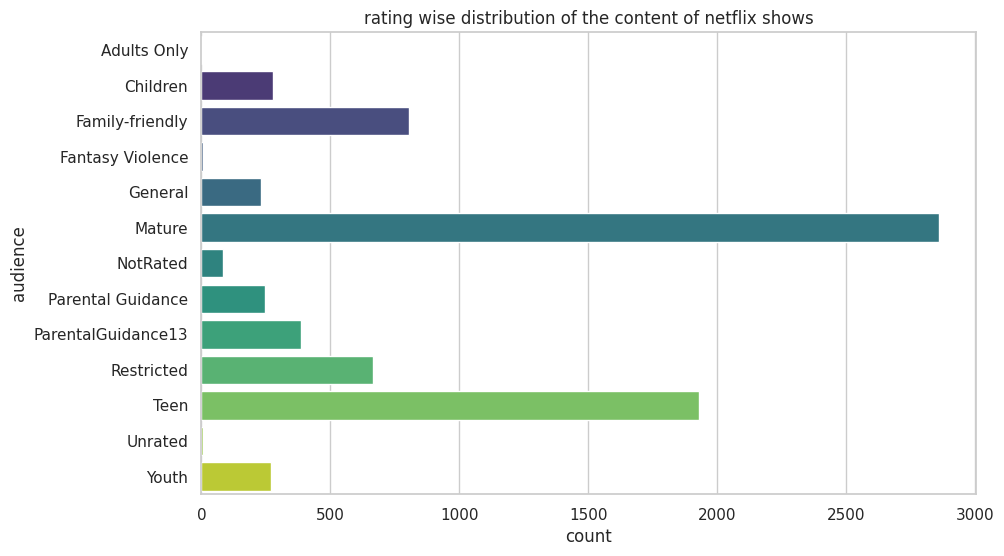

In [32]:
# Chart - 6 visualization code
#Rating wise distribution
rating_wise= df.groupby(['audience']).size().reset_index(name='count')

#generating the plot
sns.barplot(data= rating_wise, x= 'count', y='audience', palette='viridis')
plt.title('rating wise distribution of the content of netflix shows')

##### 1. Why did you pick the specific chart?

It is easy to understand the Rating wise distribution of the content on netflix using bar chart.

##### 2. What is/are the insight(s) found from the chart?

It can be seen that most contnent on Netflix is rated for Mature followed by Teen and Family friendly.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Most of the content is rated for Mature category, making them the largest target audience. Similarly 2nd largest target audience are teens. It is more appropriate to continue allocating more budget to these categories as they serve the major chunk of the customers.

#### Chart - 7

Text(0.5, 1.0, 'Production country wise distribution of content')

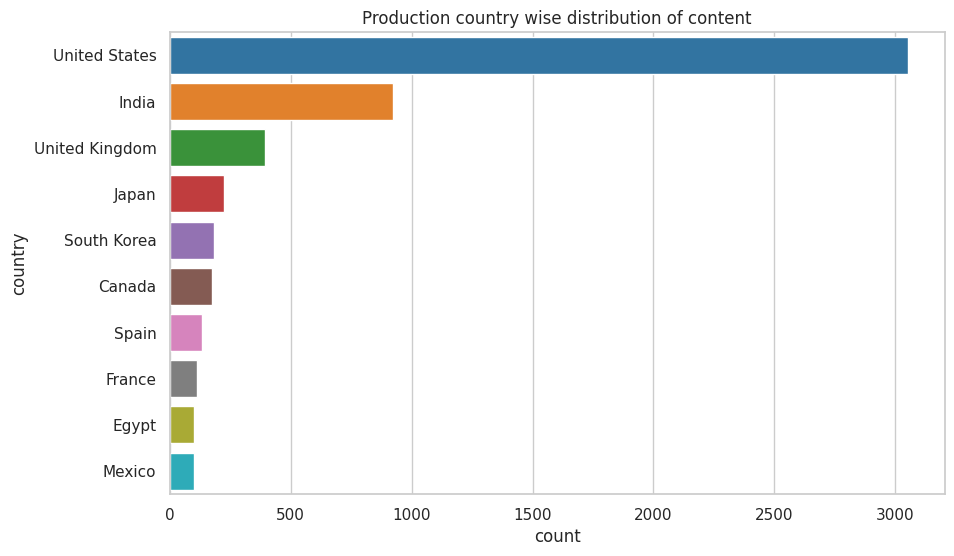

In [33]:
# Chart - 7 visualization code
# Country wise content production
country_wise_10= df.groupby('country').size().reset_index(name='count').sort_values(by='count', ascending=False).head(10)
sns.barplot(data= country_wise_10, y='country', x='count')
plt.title('Production country wise distribution of content')

##### 1. Why did you pick the specific chart?

with bar chart it is easier to understand the categorical distribution of data

##### 2. What is/are the insight(s) found from the chart?

It is evident that country producing most number of content for Netflix is USA, followed by India and UK.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Netflix can consider investing more in these regions for producing more relevant local content as these countries are producing majoer chunk of the content on the platform

Further, more resource can be allocated towards acquiring quality content from these regions.

#### Chart - 8

Text(0.5, 1.0, 'Top 10 genres on Netflix')

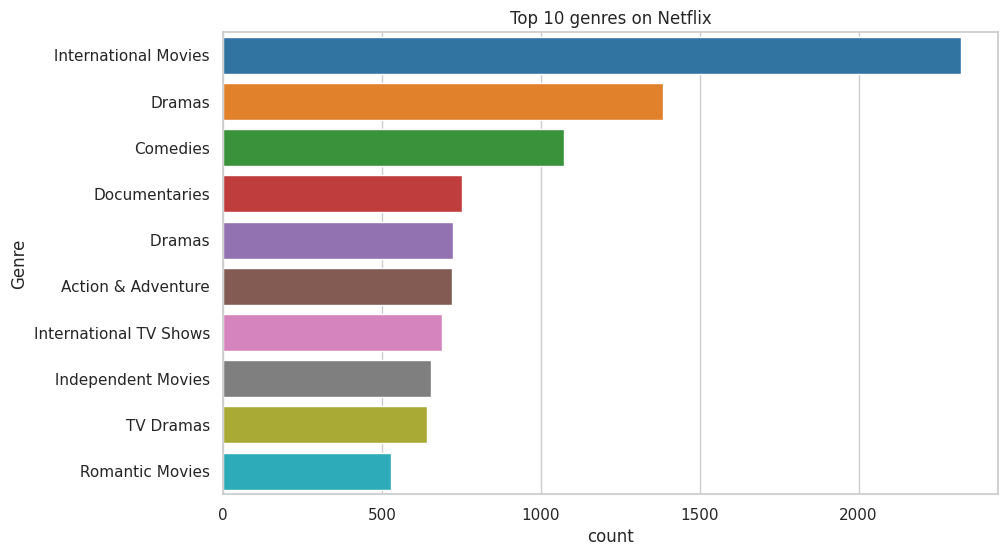

In [34]:
# Chart - 8 visualization code
# Genre wise distribution
genres= df.set_index('title').listed_in.str.split(',', expand=True).stack().reset_index(level=1, drop=True)
sns.countplot(y = genres, order=genres.value_counts().index[:10])
plt.xlabel('count')
plt.ylabel('Genre')
plt.title("Top 10 genres on Netflix")

##### 1. Why did you pick the specific chart?

Countplot has been chosen since it is efficient in ploting the categorical distribution.

##### 2. What is/are the insight(s) found from the chart?

It is found that international movies, followed by Drama and Comidies genre top the content on Netflix.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

More resource can be allocated towards acquiring International Movies, Drama and comedy content followed by other genres since these form the top 3 genres on Netflix

#### Chart - 9

In [35]:
#Getting all the unique values in the column duration
df['duration'].unique()

array(['4 Seasons', '93 min', '78 min', '80 min', '123 min', '1 Season',
       '95 min', '119 min', '118 min', '143 min', '103 min', '89 min',
       '91 min', '149 min', '144 min', '124 min', '87 min', '110 min',
       '128 min', '117 min', '100 min', '2 Seasons', '84 min', '99 min',
       '90 min', '102 min', '104 min', '105 min', '56 min', '125 min',
       '81 min', '97 min', '106 min', '107 min', '109 min', '44 min',
       '75 min', '101 min', '3 Seasons', '113 min', '114 min', '130 min',
       '94 min', '140 min', '135 min', '82 min', '70 min', '121 min',
       '92 min', '164 min', '53 min', '83 min', '116 min', '86 min',
       '120 min', '96 min', '126 min', '129 min', '77 min', '137 min',
       '148 min', '28 min', '122 min', '176 min', '85 min', '22 min',
       '68 min', '111 min', '29 min', '142 min', '168 min', '21 min',
       '59 min', '20 min', '98 min', '108 min', '76 min', '26 min',
       '156 min', '30 min', '57 min', '150 min', '133 min', '115 min',
       '

Since values contain 'Season','Seasons', these are not specifying the duration of the content in specific time intervals. Hence, these entries can be dropped for calculation. Further, 'min' needs to be stripped from each entry and converted to float64 format for making them ready for visualization

In [36]:
#function to clean the values
def clean_duration(dataframe):
  '''filters rows with duration in minutes and strips off min from them'''
  dataframe = dataframe[~dataframe['duration'].str.contains('Season|Seasons')]
  dataframe['duration'] = dataframe['duration'].str.replace('min', '').str.strip()
  return dataframe

In [37]:
#create a copy of dataframe for generation of this visualization
dur=df.copy()

In [38]:
#applying the function to clean the column
dur= clean_duration(dur)

In [39]:
#checking the dataframe for required modifications
dur.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,day_added,month_added,year_added,audience
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,23,12,2016,Mature
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",20,12,2018,Restricted
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",16,11,2017,ParentalGuidance13
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123,Dramas,A brilliant group of students become card-coun...,1,1,2020,ParentalGuidance13
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,2020-06-01,2019,TV-MA,95,"Horror Movies, International Movies","After an awful accident, a couple admitted to ...",1,6,2020,Mature


In [40]:
#setting the data type to float65
dur['duration']= dur['duration'].astype(float64)

Text(0.5, 1.0, 'distribution of duration')

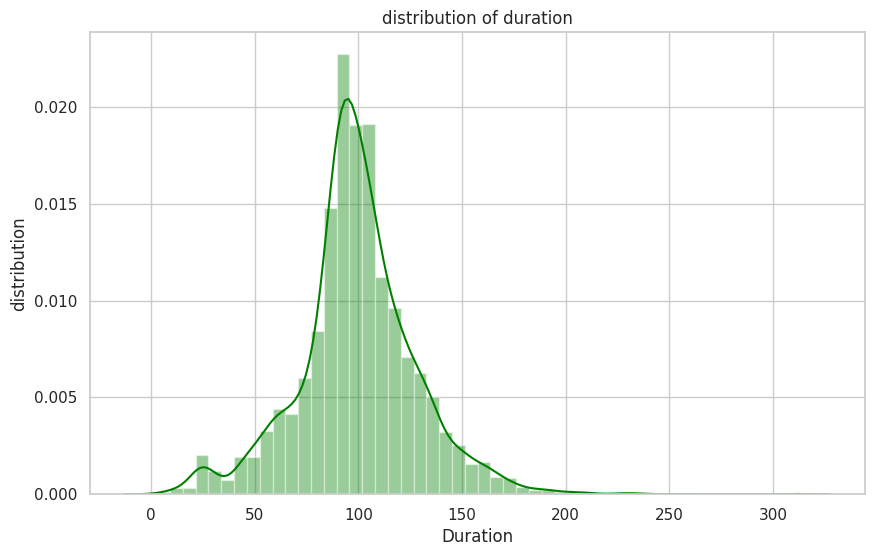

In [41]:
# Chart - 9 visualization code
#creating the distribution plot
sns.distplot(dur['duration'], bins=50, color='green')
plt.xlabel('Duration')
plt.ylabel('distribution')
plt.title('distribution of duration')

##### 1. Why did you pick the specific chart?

distribution plots are appropriate for duration since it is discrete data, thereby help us in understanding the distribution

##### 2. What is/are the insight(s) found from the chart?

From the above chart it can be seen that, most content on Netflix is of duration about 90 to 100 minutes. Further, the distribution is slightly right skewed and exhibits relatively higher levels of kurtosis.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

It is thus clear that most viewed content duration is about 100 minutes. Hence, producing content with duration ranging between 90 to 100 minutes will be a wiser decision.

#### Chart - 10 - Correlation Heatmap

In [42]:
#making dataframe for creation of crosstable
df_heatmap=df[['audience','country']]
df_heatmap= df_heatmap[df_heatmap['country'].isin(country_wise_10['country'])]

# Create a crosstab table
heatmap_table = pd.crosstab(df_heatmap['audience'], df_heatmap['country'])

In [43]:
#the crosstable
heatmap_table

country,Canada,Egypt,France,India,Japan,Mexico,South Korea,Spain,United Kingdom,United States
audience,,,,,,,,,,
Adults Only,1,0,0,0,0,0,0,0,0,1
Children,17,0,9,6,1,0,4,2,16,150
Family-friendly,22,4,3,133,39,5,15,5,74,304
Fantasy Violence,1,0,0,1,0,0,0,0,0,2
General,15,0,2,9,1,2,1,1,21,123
Mature,60,28,75,228,82,69,83,109,167,1038
NotRated,2,0,0,5,0,4,3,1,5,34
Parental Guidance,8,0,1,3,5,0,0,1,2,147
ParentalGuidance13,3,0,1,4,3,1,0,1,7,230


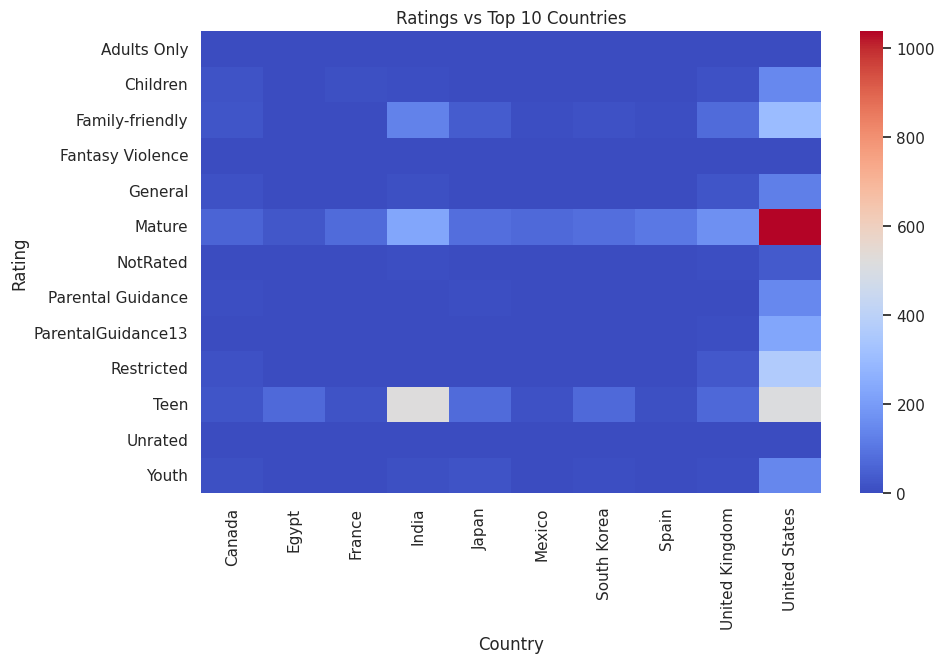

In [44]:
# Plot the heatmap
sns.heatmap(heatmap_table, cmap='coolwarm')
plt.title('Ratings vs Top 10 Countries')
plt.xlabel('Country')
plt.ylabel('Rating')
plt.show()

##### 1. Why did you pick the specific chart?

Heatmaps are the best type of visualizations to understand the relationship between variables of any data set. Hence, Heatmap was chosen

##### 2. What is/are the insight(s) found from the chart?

The heatmap shows the audience rating wise content production in each country.
1. In United States, it is clear that Mature rated content is mostly created followed by Teen and Restricted content.
2. In India which is the 2nd largest nation producing content, Teen rated content is most created followed by Mature rated and Family-friendly rated content.
3. Similarly in UK, Mature rated content is most produced followed by Family friendly and Teen rated content.

##### 3. Business implictions

It is extremely important for the country to allocate adeqaute resource in acquiring quality content for the above discussed ratings in each country.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [45]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [46]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [47]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

In [48]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'day_added', 'month_added', 'year_added', 'audience'],
      dtype='object')

In [49]:
text_df = df[['title']]
#combining values from all other textual fields
text_df['text']= (df['director']+' '+df['type']+' '+df['country']+' '+df['cast']+' '+df['rating']+' '+df['listed_in']+' '+df['description']).astype(str)

In [50]:
text_df.head(10)

,title,text
0,3%,"Raúl Campos, Jan Suter TV Show Brazil João Mig..."
1,7:19,"Jorge Michel Grau Movie Mexico Demián Bichir, ..."
2,23:59,"Gilbert Chan Movie Singapore Tedd Chan, Stella..."
3,9,"Shane Acker Movie United States Elijah Wood, J..."
4,21,Robert Luketic Movie United States Jim Sturges...
5,46,"Serdar Akar TV Show Turkey Erdal Beşikçioğlu, ..."
6,122,"Yasir Al Yasiri Movie Egypt Amina Khalil, Ahme..."
7,187,Kevin Reynolds Movie United States Samuel L. J...
8,706,"Shravan Kumar Movie India Divya Dutta, Atul Ku..."
9,1920,"Vikram Bhatt Movie India Rajneesh Duggal, Adah..."


#### 1. Expand Contraction

In [51]:
#installong contractions library
!pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 15.9 MB/s eta 0:00:00


In [52]:
# Importing the module
import contractions

In [53]:
#Expand Contraction
def expand_text(text):
  '''this function takes text as input and expands the contracted textual content'''
  try:
    return contractions.fix(text)
  except:
    return ''

In [54]:
#applying the function
text_df['text']=text_df['text'].apply(expand_text)

In [55]:
#randomly checking for presence of contracted word
text_df['text'].iloc[10]

"Zak Hilditch Movie United States Thomas Jane, Molly Parker, Dylan Schmid, Kaitlyn Bernard, Bob Frazer, Brian d'Arcy James, Neal McDonough TV-MA Dramas, Thrillers A farmer pens a confession admitting to his wife's murder, but her death is just the beginning of a macabre tale. Based on Stephen King's novella."

Hence, we can conclude that there are no contracted words in the whole data frame - text_df

#### 2. Lower Casing

In [56]:
# Lower Casing
text_df['text']=text_df['text'].str.lower()

#### 3. Removing Punctuations

In [57]:
import string

In [58]:
# Remove Punctuations
text_df['text']=text_df['text'].str.replace('[{}]'.format(string.punctuation),'')

#### 4. Removing URLs & Removing words and digits contain digits.

In [59]:
# Remove URLs & Remove words and digits contain digits
text_df['text']=text_df['text'].str.replace(r'http\S+|www.\S+|https\S+','', case=False)
text_df['text']=text_df['text'].str.replace(r'\w*\d\w*', '')

#### 5. Removing Stopwords & Removing White spaces

In [60]:
# Remove Stopwords
def remove_stopwords(text):
  '''This function removes stopwords in a sentence'''
  words=text.split()
  new_words= [word for word in words if word.lower() not in stopwords.words('english')]
  return ' '.join(new_words)

In [61]:
#applying the function to remove stopwords
text_df['text']=text_df['text'].apply(remove_stopwords)

In [62]:
text_df['text'].iloc[1]

'jorge michel grau movie mexico demián bichir héctor bonilla oscar serrano azalia ortiz octavio michel carmen beato tvma dramas international movies devastating earthquake hits mexico city trapped survivors walks life wait rescued trying desperately stay alive'

In [63]:
# Remove White spaces
text_df['text']=text_df['text'].str.replace(r'\s+|-+', ' ', regex=True)

#### 6. Rephrase Text

#### 7. Tokenization

In [64]:
# Tokenization
def the_tokenizer(sentence):
  '''this function tokenizes the sentence'''
  tokens= nltk.word_tokenize(sentence)
  return tokens

#### 8. Tokenization and Text Normalization

In [65]:
lemmetizer= WordNetLemmatizer()

In [66]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
# Rephrase Text
def lemma(sentence):
  ''' This function takes sentence input and returns its lemmetized version'''
  words=nltk.word_tokenize(sentence)
  lemmatized_word=[lemmetizer.lemmatize(word) for word in words]
  return ' '.join(lemmatized_word)

In [67]:
text_df['text']=text_df['text'].apply(lemma)

##### Which text normalization technique have you used and why?

Lemmatization was chosen to normalize the texts since data is not extremely huge and computational power is more than enough for a normal computer, thereby making context based text normalization.

#### 9. Part of speech tagging

In [68]:
# POS Taging

#### 10. Text Vectorization

In [69]:
bag_of_words= text_df.text

In [70]:
# Vectorizing Text
tf_idf= TfidfVectorizer(max_features= 30000)
X= tf_idf.fit_transform(bag_of_words)

In [71]:
X.shape

(7770, 30000)

In [72]:
tf_idf.get_feature_names_out()

array(['aadarsh', 'aaditi', 'aahana', ..., 'şükrü', 'źak', 'żulewska'],
      dtype=object)

In [73]:
print(X)

  (0, 22938)	0.21000539837874888
  (0, 20128)	0.1759132088694935
  (0, 10030)	0.1150405356997032
  (0, 3417)	0.12397489423386424
  (0, 14508)	0.09643176953875472
  (0, 7535)	0.0941344619341306
  (0, 22199)	0.1658984011512352
  (0, 4448)	0.18923628281090513
  (0, 6612)	0.14862334393498644
  (0, 14953)	0.16757817044783282
  (0, 9562)	0.1310978254657951
  (0, 9350)	0.19429416896455487
  (0, 5945)	0.13216888358330728
  (0, 7274)	0.12225877126024826
  (0, 6609)	0.09576177457051359
  (0, 20414)	0.09658338557404048
  (0, 5539)	0.045538443864723346
  (0, 9432)	0.03977633237798406
  (0, 26290)	0.045323442834280095
  (0, 3326)	0.18923628281090513
  (0, 29632)	0.20081491833121817
  (0, 20878)	0.14646299452809117
  (0, 12838)	0.1527559378288674
  (0, 16339)	0.1816096305654292
  (0, 27472)	0.21000539837874888
  :	:
  (7768, 3056)	0.05774966485034117
  (7768, 17810)	0.05771654710450251
  (7769, 5650)	0.2811086122434768
  (7769, 6124)	0.2772604523775791
  (7769, 9108)	0.25414492175323367
  (7769, 226

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [74]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [75]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

It is to be noted that all the feaures have been combined to form

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [76]:
# Transform Your data

### 6. Data Scaling

In [77]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Dimensionality reduction needs to be performed since we have a sparse matrix.

In [78]:
# DImensionality Reduction (If needed)
pca= PCA()
pca.fit(X.toarray())

PCA()

In [79]:
#X.toarray()

In [80]:
#Calculating cumulative variance ratios
variance_ratio= pca.explained_variance_ratio_
cum_var_ratio= np.cumsum(variance_ratio)

Text(0, 0.5, 'variance')

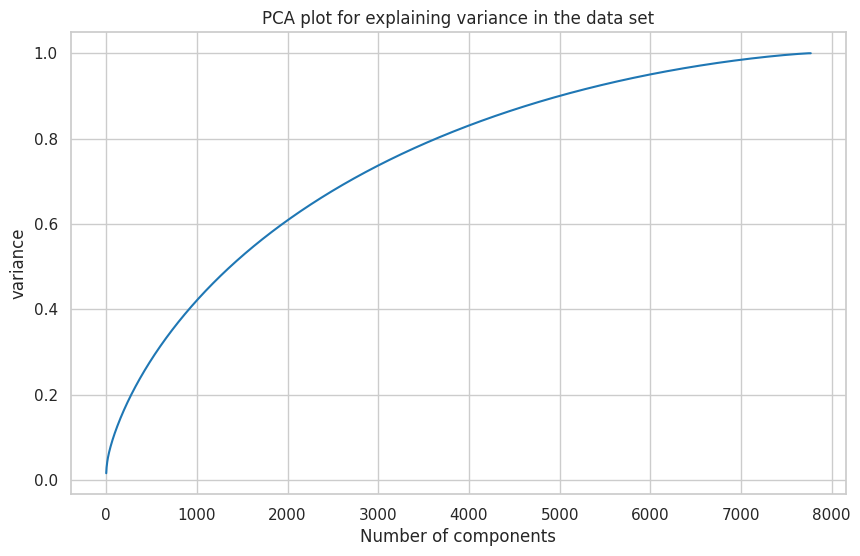

In [81]:
#Plotting Cumulative Variance Ratios
plt.plot(cum_var_ratio)
plt.title('PCA plot for explaining variance in the data set')
plt.xlabel('Number of components')
plt.ylabel('variance')

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Since we have a sparse matrix, it i snecessary to perform dimensionality reduction. However,  PCA was chosen among PCA, Singular Value Decomposition and other models owing to easy computabilty.



We can thus see that about 6000 features are sufficient to explain 95% of variance in the data set. Thus, we can keep the features sufficient enough to explain 95% variance of the data set for building the clustering model.

In [82]:
#svd=TruncatedSVD(n_components= X.shape[1]-1)

In [83]:
#svd.fit(X)

### 8. Feature selection

In [84]:
# Choosing features that explain 95% of the variance occuring in the data set
#setting the pca to explain 95 percent of the variance
pca_optimized= PCA(n_components=0.95)

#fitting PCA on to sparse matrix X
pca_optimized.fit(X.toarray())

PCA(n_components=0.95)

In [85]:
#Creating feature space from optimized PCA on X
X_optimized= pca_optimized.transform(X.toarray())
#printing the shape of X_optimized
X_optimized.shape

(7770, 5991)

Now, with 5991 features that exlplain 95 percent of the variance, it is a good idea to build the machine learning model with.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [86]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

In [87]:
!pip install yellowbrick

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### ML Model - 1

In [88]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

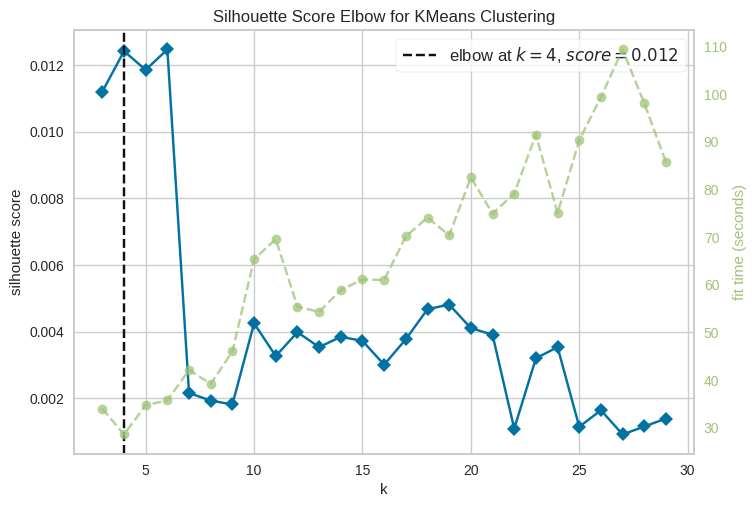

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [89]:
# ML Model - 1 Implementation
model= KMeans(random_state=9)
K_plotter= KElbowVisualizer(model, k= (3,30), metric='silhouette', locate_elbow=True)
# Fit the Algorithm
K_plotter.fit(X_optimized)
# Predict on the model
K_plotter.show()

In [100]:
#import 
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score, silhouette_samples

In [103]:
from yellowbrick.cluster.silhouette import silhouette_visualizer
def elbow_finder(n):
  for n_clusters in range(2, n+1):
    kmodel=KMeans(n_clusters=n_clusters, random_state=9)
    X_predict= kmodel.fit_predict(X_optimized)
    centres= kmodel.cluster_centers_

    score= silhouette_score(X_optimized, X_predict, metric='euclidean')
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

    visualizer= SilhouetteVisualizer(kmodel)
    visualizer.fit(X_optimized)
    visualizer.poof()

For n_clusters = 2, silhouette score is 0.011745215583633123


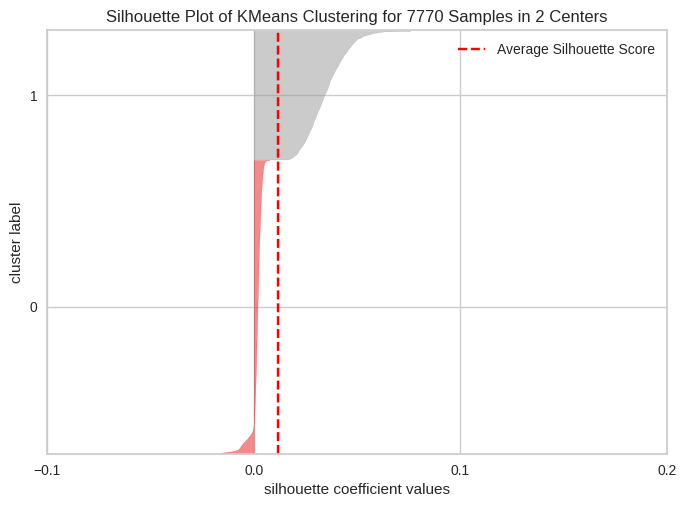

For n_clusters = 3, silhouette score is 0.0111996009192065


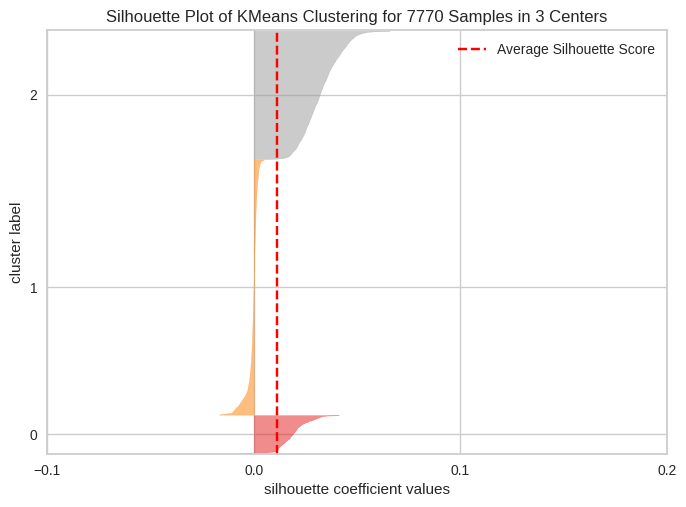

For n_clusters = 4, silhouette score is 0.012413490374676924


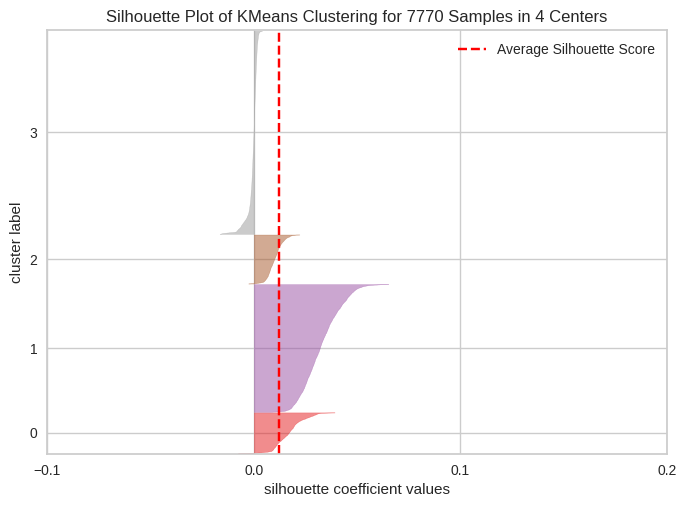

For n_clusters = 5, silhouette score is 0.01185410077486115


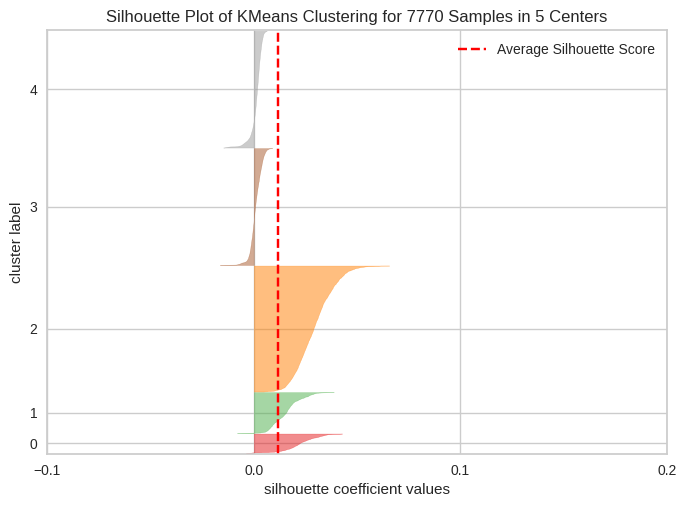

For n_clusters = 6, silhouette score is 0.01246424422920912


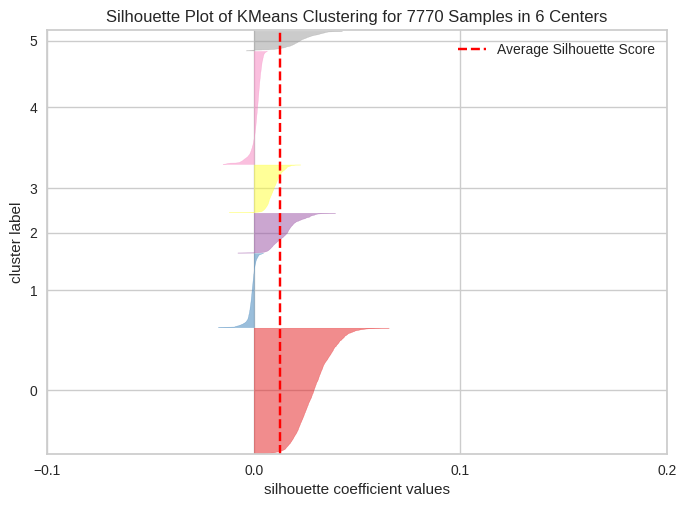

For n_clusters = 7, silhouette score is 0.0021639458396926162


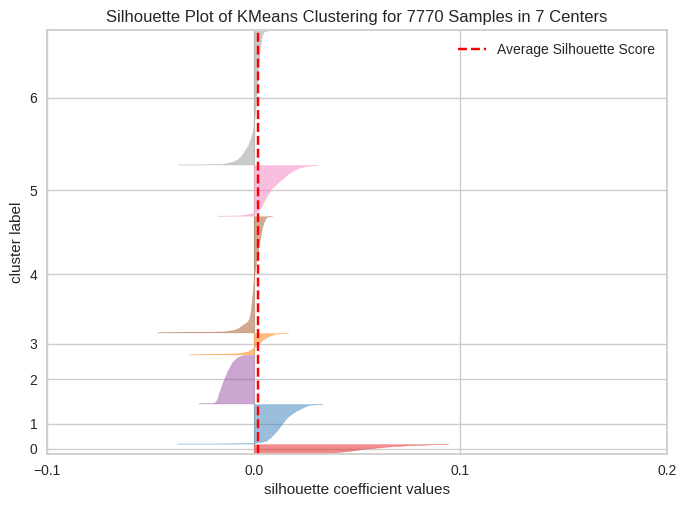

For n_clusters = 8, silhouette score is 0.0019360807976895734


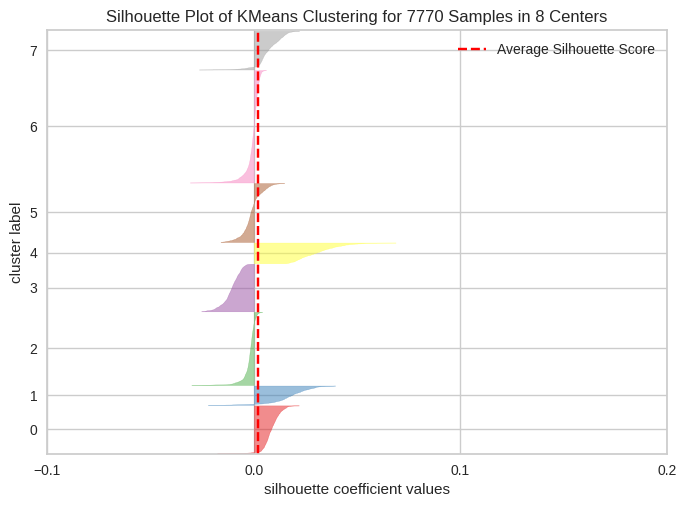

For n_clusters = 9, silhouette score is 0.0018209713539536802


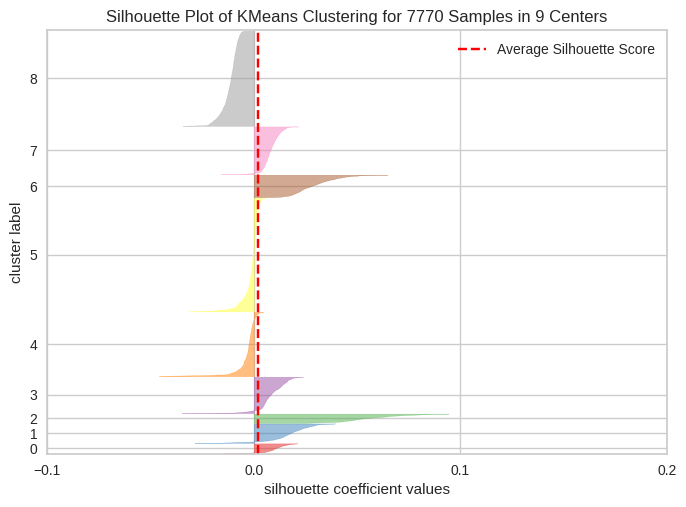

For n_clusters = 10, silhouette score is 0.004253362855852559


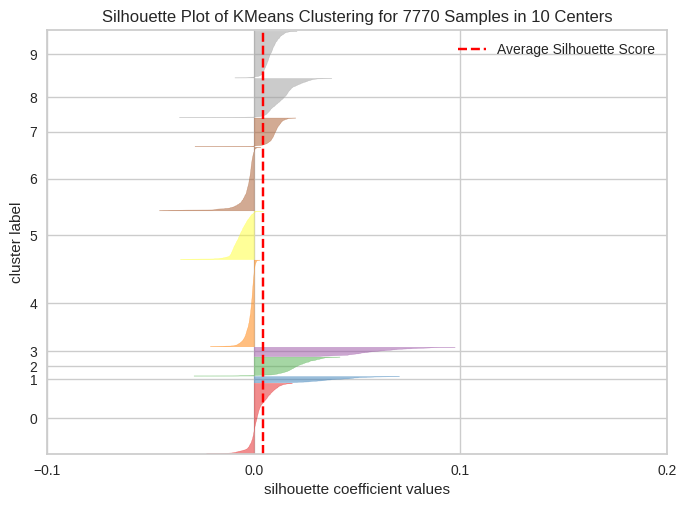

For n_clusters = 11, silhouette score is 0.0032715610294345642


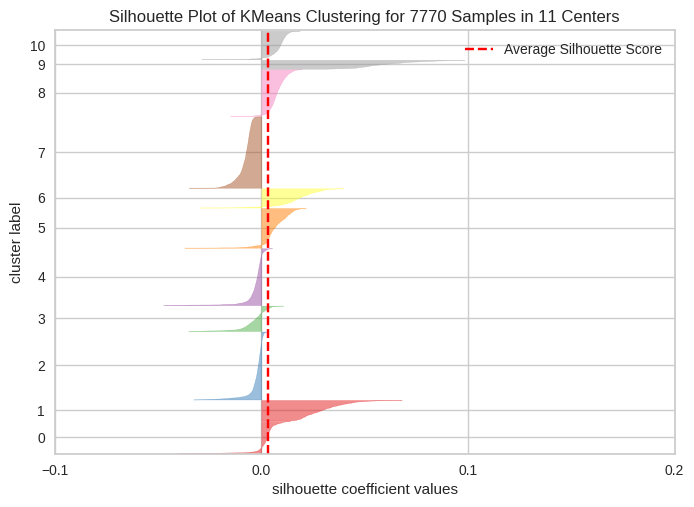

For n_clusters = 12, silhouette score is 0.003987475922725342


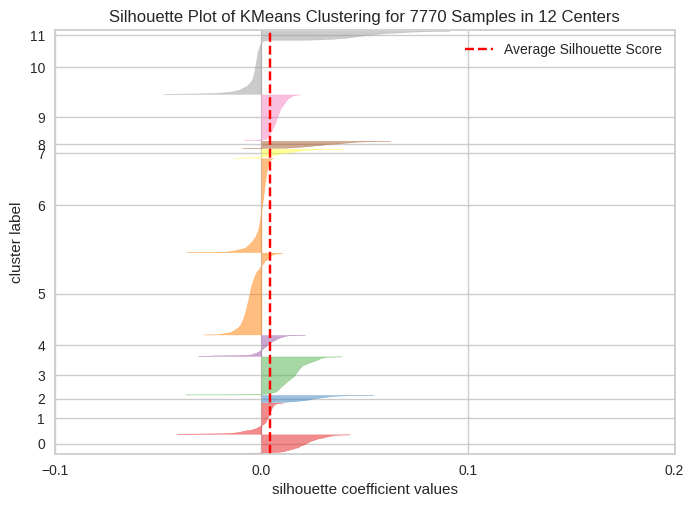

For n_clusters = 13, silhouette score is 0.00353924576988722


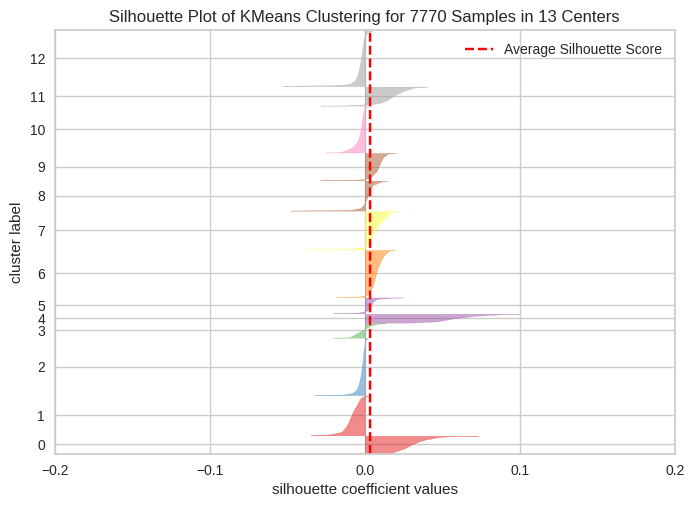

For n_clusters = 14, silhouette score is 0.0038496780229097345


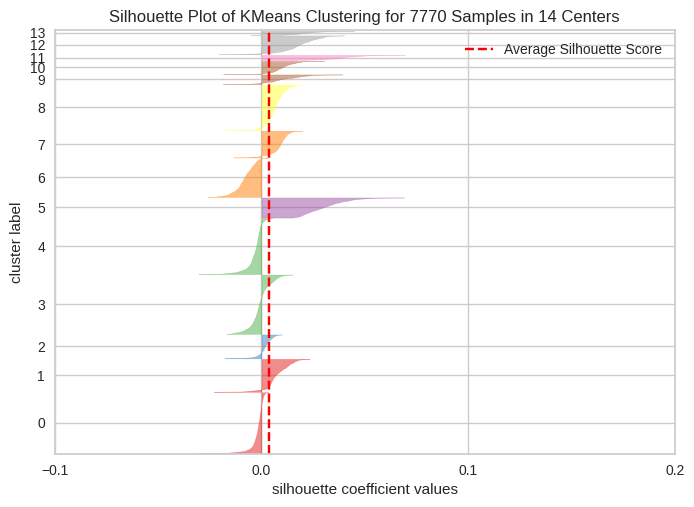

For n_clusters = 15, silhouette score is 0.003726496638139966


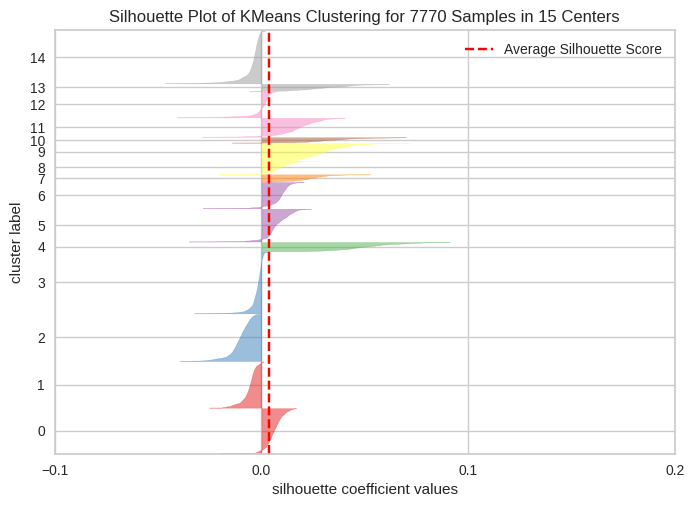

For n_clusters = 16, silhouette score is 0.0030133327879439497


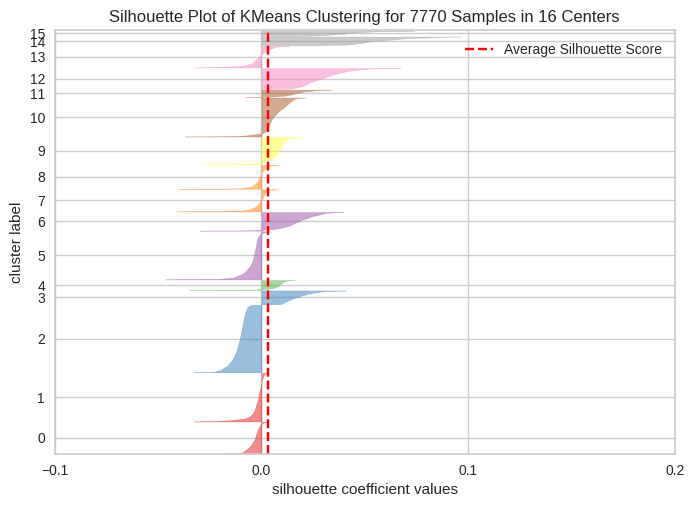

For n_clusters = 17, silhouette score is 0.0037759564689682666


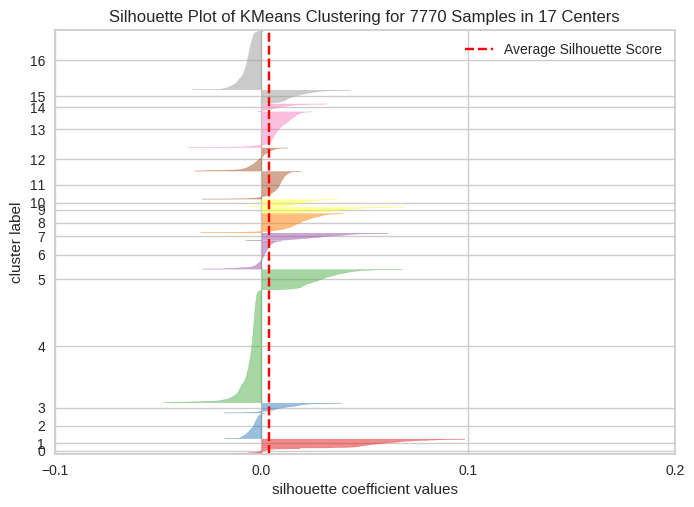

For n_clusters = 18, silhouette score is 0.004677653071829636


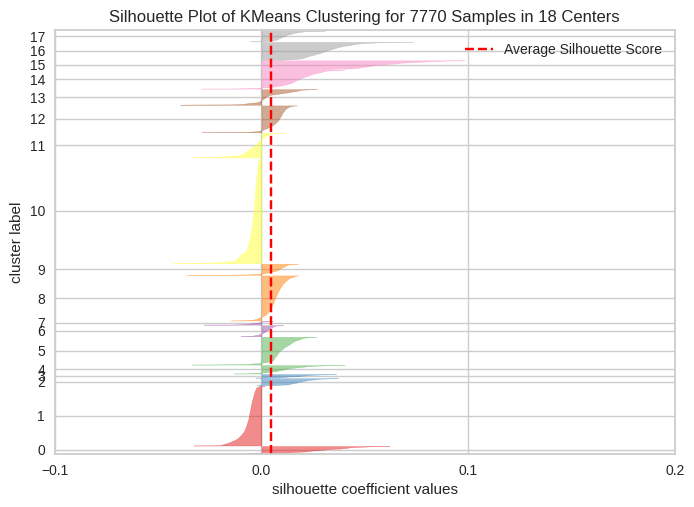

For n_clusters = 19, silhouette score is 0.004816289097304128


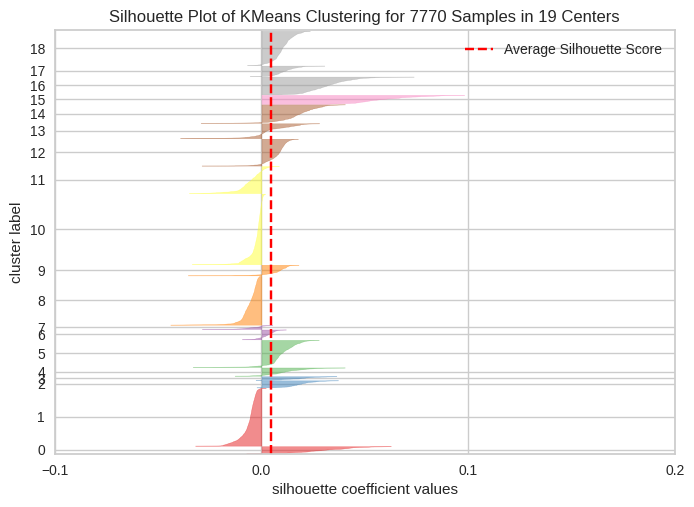

For n_clusters = 20, silhouette score is 0.004109953337898219


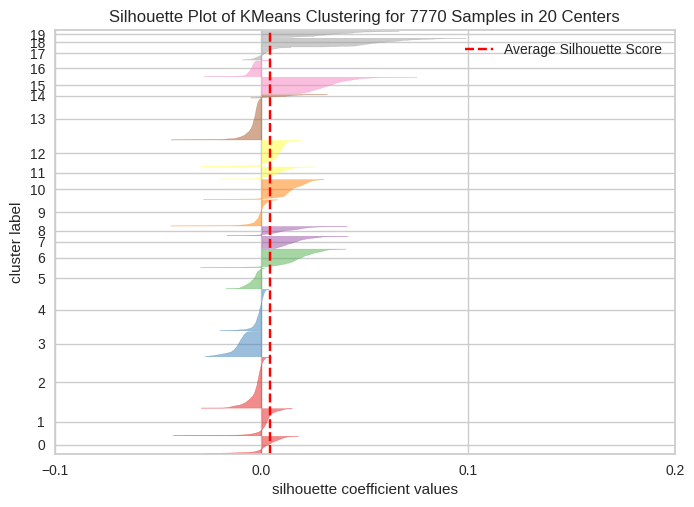

For n_clusters = 21, silhouette score is 0.003911190723258885


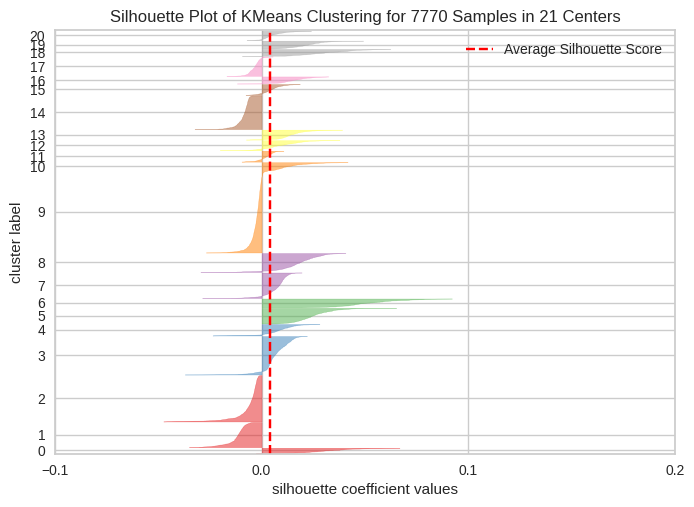

For n_clusters = 22, silhouette score is 0.001094424991562008


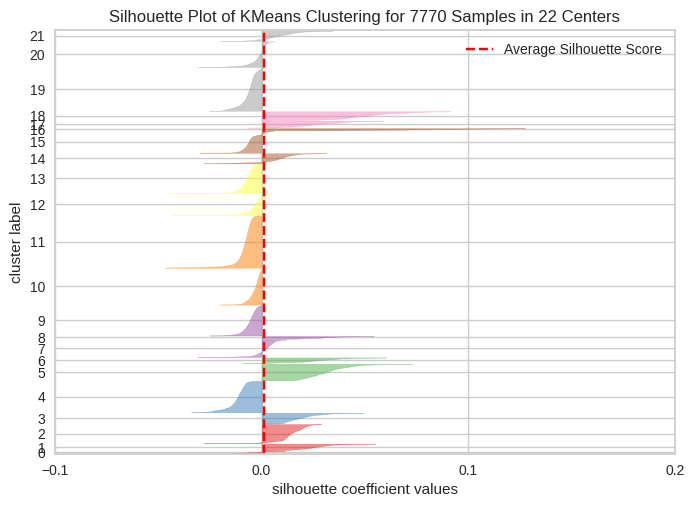

For n_clusters = 23, silhouette score is 0.003203803848407198


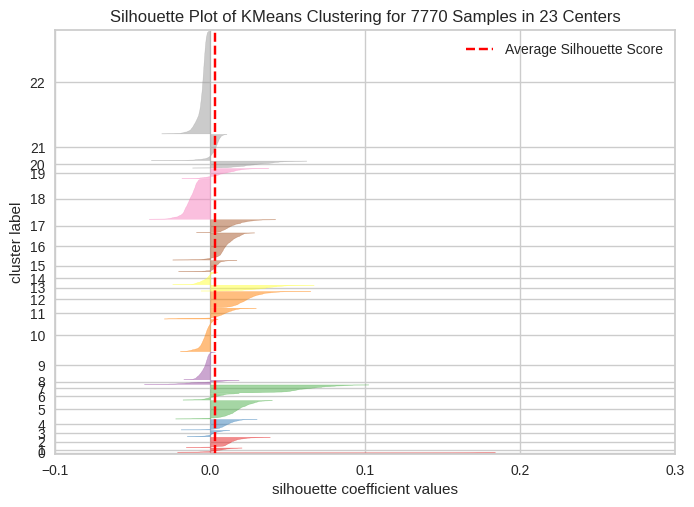

For n_clusters = 24, silhouette score is 0.0035409489963596423


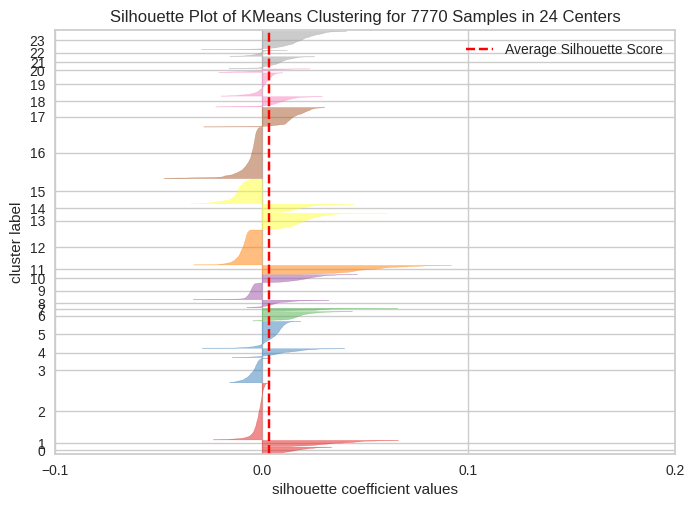

For n_clusters = 25, silhouette score is 0.0011497879458546645


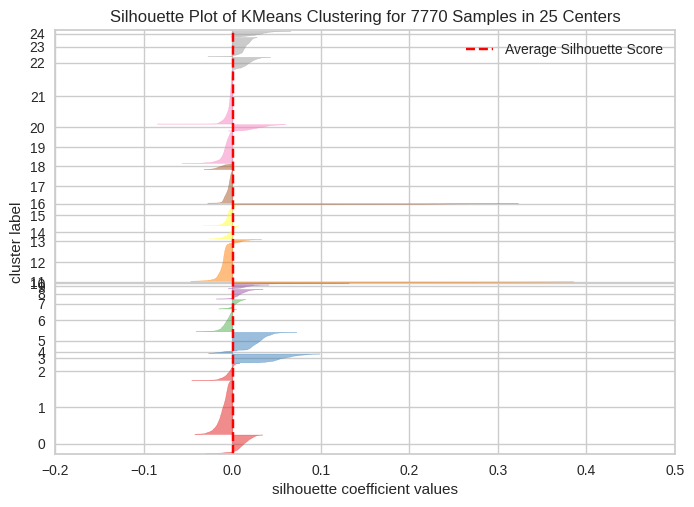

For n_clusters = 26, silhouette score is 0.0016487544118517943


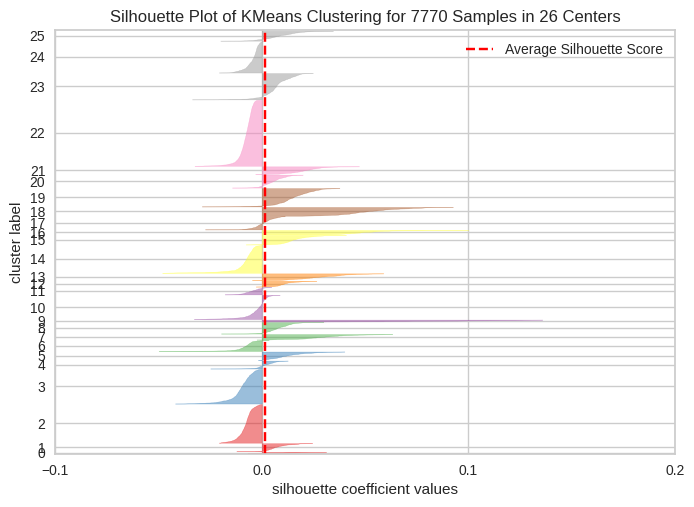

For n_clusters = 27, silhouette score is 0.0009209025285335097


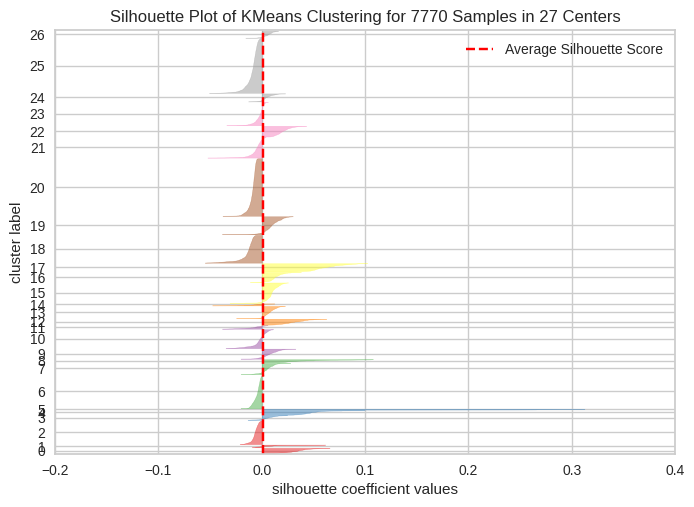

For n_clusters = 28, silhouette score is 0.001159945523425374


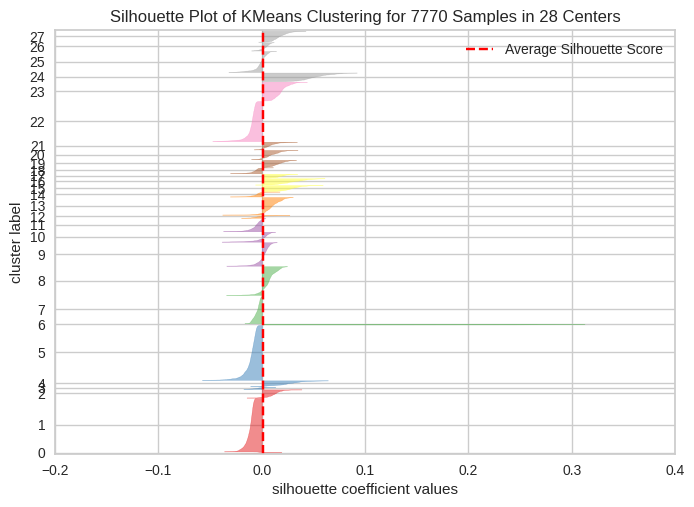

For n_clusters = 29, silhouette score is 0.0013994461139659948


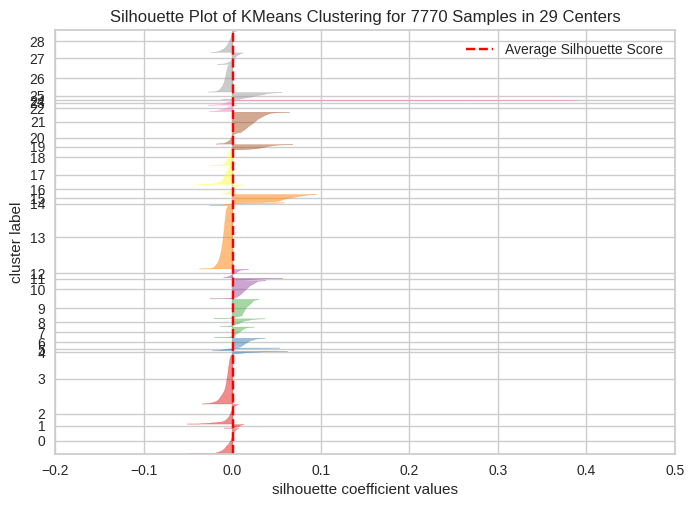

For n_clusters = 30, silhouette score is 0.0008371068753691901


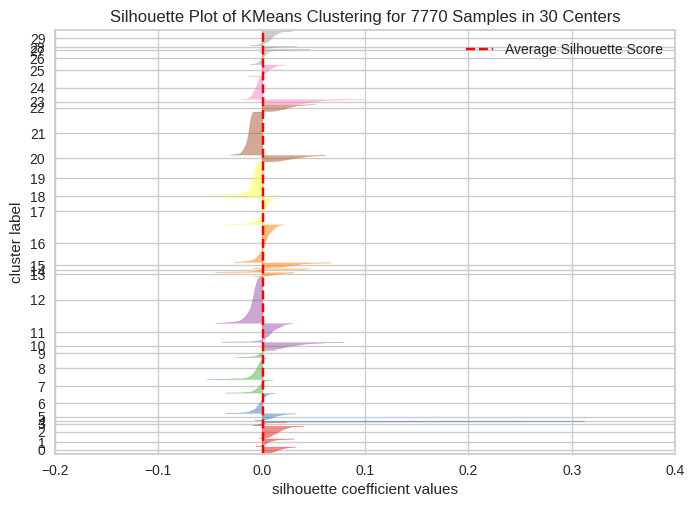

In [104]:
elbow_finder(30)

In [105]:
X_optimized.shape

(7770, 5991)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [90]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [91]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [92]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [93]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [94]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [95]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [96]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [97]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [98]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***